## Machine Learning, Spring 2023: Project 3
### Digit Recognizer

#### KAMAL SUBEDI (G35111003) 

Platform: Jupyter Notebook

Device: MacOS M2

Programming language: Python3, Python libraries

#### 1) Dataset 1 : https://www.kaggle.com/competitions/digit-recognizer/data

##### Dataset Description: MNIST dataset contain gray-scale images of hand-drawn digits, from zero to nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image. Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix. The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

In [68]:
#import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import train_test_split
import time

In [69]:
#Load the dataset
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [70]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [74]:
#Check whether any feature have null point or not. 
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

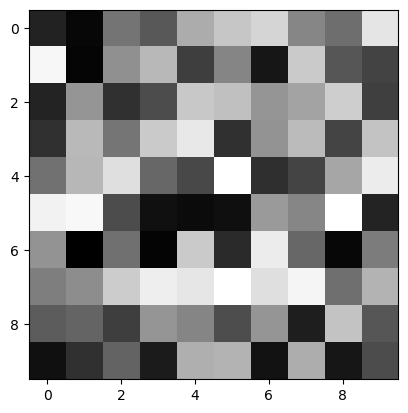

In [43]:
# Plotting images
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

labels present in dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Labels count:
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


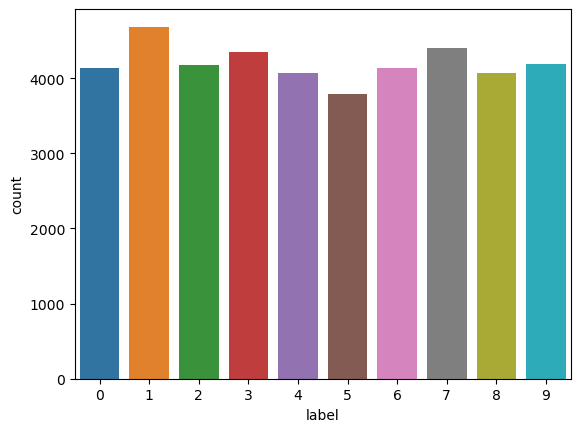

In [75]:
# Check all labels in training data
all_label = set(train_data['label'].tolist())
print("labels present in dataset: {0}".format(all_label))

# Data distribution for each class
dst_train = train_data['label'].value_counts()
print("Labels count:\n{0}".format(dst_train))

# Plot distribution
sb.countplot(x='label', data=train_data)
plt.show()

In [76]:
#Taking only 5000 datapoint 
df = train_data.values[:5000] 
df.shape

(5000, 785)

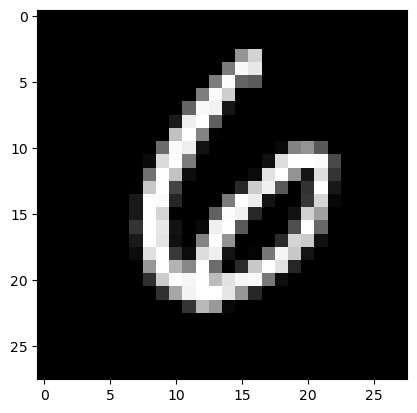

In [77]:
#print the digit
digit= df[:,1:]
im = digit[3666].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [48]:
#Seperate the target and independant variables
start_rf = time.process_time()
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]

In [49]:
#Preprocessing the dataset using standard scaler function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [51]:
#Used the random forest - machine learning model to classify the hand written digits
# Train the random Forest model 
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#Print the Classification report 
pred=model_RF.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.97       860
           3       0.96      0.94      0.95       863
           4       0.97      0.95      0.96       827
           5       0.96      0.97      0.97       756
           6       0.97      0.99      0.98       841
           7       0.97      0.96      0.96       899
           8       0.95      0.95      0.95       768
           9       0.94      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [53]:
print(pred)
end_rf = time.process_time()
print("Time elapsed for the Random forest algorithm:", end_rf - start_rf)

[3 6 9 ... 2 7 2]
Time elapsed for the Random forest algorithm: 13.059297000000015


In [54]:
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Confusion Report
[[794   0   0   1   2   2   4   0   9   1]
 [  0 947   4   2   1   1   4   0   2   0]
 [  4   0 837   4   2   0   2   5   5   1]
 [  3   0  11 814   0   9   2  10  10   4]
 [  2   2   0   0 788   1   5   2   4  23]
 [  4   2   1   7   0 733   5   2   2   0]
 [  2   0   1   0   2   5 830   0   1   0]
 [  0   3  13   2   5   1   0 860   2  13]
 [  3   4   3  10   4   9   4   0 727   4]
 [  7   2   3   8  12   2   0  10   6 762]]


In [55]:
#Cross validation
from sklearn.model_selection import cross_val_score
model_RF=RandomForestClassifier(n_estimators=100)
model_RF.fit(X, y)
score = cross_val_score(model_RF, X, y)
print (np.mean(score))

0.9650000000000001


In [56]:
#Predict the digit from test dataset using above random forest model  
pred=model_RF.predict(test_data)

/Users/kamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [57]:
#After predicting, save the csv file using submission fucntion for the test dataset
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_RF.csv",index=False)

# KNN 

In [58]:
#Seperate the target and independant variables
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]

In [59]:
X.shape

(42000, 784)

In [60]:
#Split the dataset
start_knn = time.process_time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [61]:
#Used the KNN - Machine learning model to classify the hand written digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

accuracy = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    prediction = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, prediction))
    
    

In [62]:
print(prediction)
end_knn = time.process_time()
print("Time elapsed for the KNN algorithm:", end_knn - start_knn)

[3 6 9 ... 2 7 2]
Time elapsed for the KNN algorithm: 383.50174000000004


In [63]:
#printing the accuracy for 1-10 k values. 
accuracy

[0.9709523809523809,
 0.9644047619047619,
 0.9697619047619047,
 0.9676190476190476,
 0.9680952380952381,
 0.9673809523809523,
 0.9677380952380953,
 0.9670238095238095,
 0.9667857142857142]

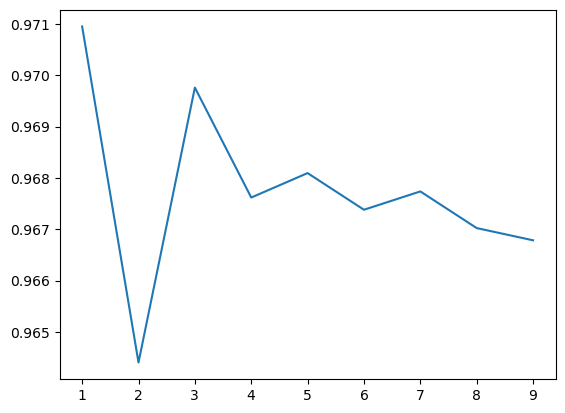

In [64]:
plt.plot(range(1,10),accuracy)

In [65]:
from sklearn.metrics import classification_report
#Printing classification report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       813
           1       0.97      1.00      0.98       961
           2       0.99      0.97      0.98       860
           3       0.97      0.98      0.97       863
           4       0.98      0.95      0.96       827
           5       0.96      0.98      0.97       756
           6       0.97      0.99      0.98       841
           7       0.96      0.97      0.97       899
           8       0.99      0.92      0.95       768
           9       0.94      0.94      0.94       812

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [66]:
pred=knn.predict(test_data)

In [67]:
#Save the predicted file using knn model 
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_knn.csv",index=False)